In [124]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob
from pathlib import Path

YEAR = '2020'

if not Path(f'figures\\{YEAR}').exists():
    Path(f'figures\\{YEAR}').mkdir(parents=True)
if Path(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png').exists():
    if input(f'DATA ALREADY EXISTS FOR {YEAR}!! CONTINUE ANYWAY?').lower() == 'no':
        raise RuntimeError()

In [125]:
paths = glob.glob(f'raw_data\\{YEAR}.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          445 non-null    object 
 1   Authors                 439 non-null    object 
 2   Author Affiliations     439 non-null    object 
 3   Publication Title       445 non-null    object 
 4   Date Added To Xplore    445 non-null    object 
 5   Publication Year        445 non-null    int64  
 6   Volume                  445 non-null    int64  
 7   Issue                   0 non-null      float64
 8   Start Page              445 non-null    object 
 9   End Page                445 non-null    object 
 10  Abstract                445 non-null    object 
 11  ISSN                    445 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     445 non-null    object 
 14  Funding Information     343 non-null    ob

In [126]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          445 non-null    object 
 1   Authors                 439 non-null    object 
 2   Author Affiliations     439 non-null    object 
 3   Publication Title       445 non-null    object 
 4   Date Added To Xplore    445 non-null    object 
 5   Publication Year        445 non-null    int64  
 6   Volume                  445 non-null    int64  
 7   Start Page              445 non-null    object 
 8   End Page                445 non-null    object 
 9   Abstract                445 non-null    object 
 10  ISSN                    445 non-null    object 
 11  DOI                     445 non-null    object 
 12  Funding Information     343 non-null    object 
 13  PDF Link                445 non-null    object 
 14  Author Keywords         434 non-null    ob

In [127]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              439 non-null    object
 1   Author Affiliations  439 non-null    object
 2   Publication Year     445 non-null    int64 
 3   Funding Information  343 non-null    object
 4   Author Keywords      434 non-null    object
 5   IEEE Terms           440 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.0+ KB


In [128]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              439 non-null    object
 1   Author Affiliations  439 non-null    object
 2   Publication Year     439 non-null    int64 
 3   Funding Information  343 non-null    object
 4   Author Keywords      434 non-null    object
 5   IEEE Terms           439 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.7+ KB


In [129]:
data.to_csv(f'agg_data\\{YEAR}.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,G. Zucatelli; R. Coelho,Laboratory of Acoustic Signal Processing (lasp...,2020,National Council for Scientific and Technologi...,Reverberation;absorption;non-stationarity;inte...,Absorption;Reverberation;Noise measurement;Dis...
1,S. S. Moghadasian; S. Gazor,"Department of Electrical Engineering, Behbahan...",2020,Natural Sciences and Engineering Research Coun...,Ambiguity;localization;sparsity;chirp,Time-frequency analysis;Market research;Signal...
2,M. N. Akbar; M. Saquib,"Northeastern University, Boston, MA, USA; Depa...",2020,NaN,Real-only equalizer (ROE);widely linear equal-...,Equalizers;Correlation;Complexity theory;Recei...
3,Y. Li; Q. He; R. S. Blum,University of Electronic Science and Technolog...,2020,National Natural Science Foundation of China(g...,Product of correlated complex Gaussian random ...,Random variables;Probability density function;...
4,L. Sun; Y. Wang,Department of Information and Communications E...,2020,National Natural Science Foundation of China(g...,Sequence detection;deep-learning;recurrent neu...,Artificial neural networks;Detectors;Computer ...


In [130]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    if len(authors) != len(affiliations):
        print(i)
        print(authors, affiliations, sep='\n')
        print(len(authors), len(affiliations))
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        # if aff.split(', ')[-1] in ():
        #     print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

In [131]:
south_korea = ('Republic of Korea', 'Korea', 'KR',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR', 'TURKEY')
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China', 'HK', 'Hong Kong.', 'Hong kong')
the_netherlands = ('Netherlands', 'The Netherland', 'NL',)
sar_china = ('SAR', )
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', )
china = ('China,', "People's Republic of China", 'P. R. China', 'P.R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', 'Xi’an', 'Beijing', 'Chongqing University', 'Ministry of Industry and Information Technology', '210094 China', 'Army Artillery and Air Defense Academy of PLA', 'Hubei Key Laboratory of Optical Information',)
czechia = ('the Czech Republic', 'Czechia',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US', 'TX USA',)
italy = ('Italy.', 'IT',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG', '138632', '119077')
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.', 'Taiwan 320',)
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES', 'Computer Vision Center')
belgium = ('Louvain-la-Neuve', 'BE')
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)
india = ('IN', 'Karnataka', )
south_africa = ('ZA',)
thailand = ('TH',)
france = ('FR',)
finland = ('FI',)
japan = ('JP',)
iran = ('IR',)
germany = ('DE',)
denmark = ('DK', )
ivory_coast = ('Cäte d’Ivoire')
israel = ('Beersheba', 'Haifa')
russia = ('Russian Federation',)
qatar = ('QATAR')

In [132]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
countries = countries.replace(india, 'India')
countries = countries.replace(south_africa, 'South Africa')
countries = countries.replace(thailand, 'Thailand')
countries = countries.replace(france, 'France')
countries = countries.replace(finland, 'Finland')
countries = countries.replace(japan, 'Japan')
countries = countries.replace(iran, 'Iran')
countries = countries.replace(germany, 'Germany')
countries = countries.replace(denmark, 'Denmark')
countries = countries.replace(ivory_coast, 'Ivory Coast')
countries = countries.replace(israel, 'Israel')
countries = countries.replace(russia, 'Russia')
countries = countries.replace(qatar, 'Qatar')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
None
<class 'pandas.core.series.Series'>
Index: 1460 entries, 0 to 1459
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB
None
China              718
USA                151
South Korea         82
India               58
France              42
Italy               39
Taiwan              29
U.K.                27
Japan               26
Brazil              25
Hong Kong           22
Spain               21
Singapore           19
Germany             17
Turkey              17
Australia           17
Canada              16
Iran                15
Belgium             14
Finland             14
Switzerland         13
Portugal            11
Israel               7
Greece               6
Bulgaria             6
Norway              

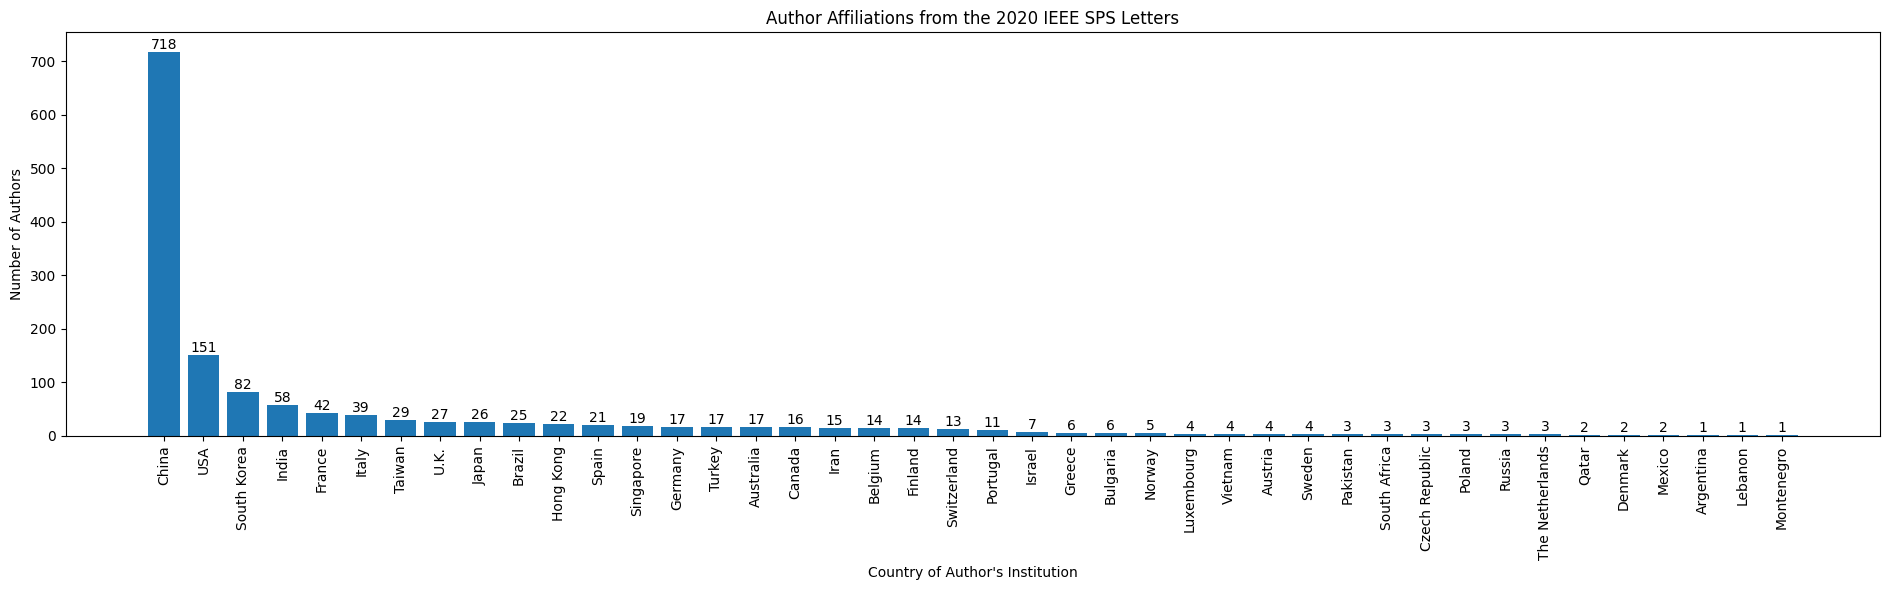

In [133]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE SPS Letters')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [134]:
super_counts = counts.nlargest()
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


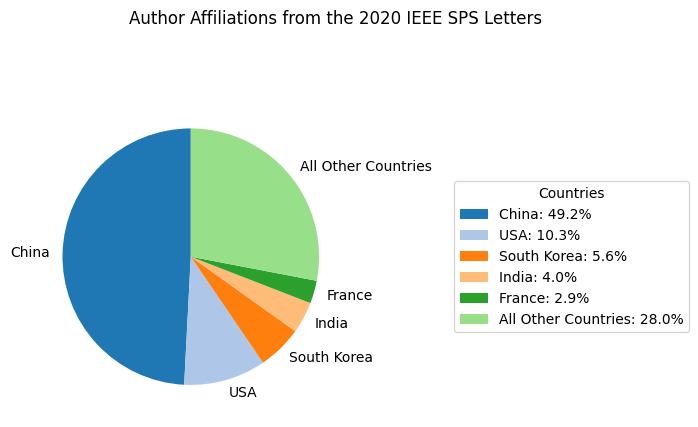

In [135]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE SPS Letters')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()